3654
['닭발', '불닭', '주먹밥', '단계', '돌뼈', '양도', '계란찜', '치즈', '국물', '무뼈', '콩나물국', '음식', '매콤', '시간', '양념', '양은', '세트', '냄새', '피스', '추천', '불맛', '포장', '가격', '사람', '서비스', '원래', '느낌', '단골', '숯불', '혼자', '계속', '두번째', '실망', '중독', '만족', '메뉴', '전화', '야식', '날치', '추가', '똥집', '번창', '다시', '입맛', '강추', '중간', '대박', '기분', '닭똥집', '이상', '소스', '직화', '마늘', '야채', '맛남', '분도', '화룡', '치킨', '사장', '짱짱', '달라', '편이', '대비', '먹음', '사진', '스트레스', '신경', '기도', '주시', '존맛', '떡볶이', '진심', '요기', '감동', '참고', '양파', '후기', '가끔', '대자', '콩나물', '기본', '아저씨', '다른', '전체', '점점', '만해', '날개', '친구', '단맛', '요청', '무난', '세번', '달달', '스팸', '참치', '언제', '술안주', '예상', '문자', '굿굿']
[('닭발', 911), ('불닭', 304), ('주먹밥', 262), ('단계', 248), ('돌뼈', 243), ('양도', 218), ('계란찜', 169), ('치즈', 150), ('국물', 149), ('무뼈', 147), ('콩나물국', 125), ('음식', 122), ('매콤', 118), ('시간', 110), ('양념', 102), ('양은', 92), ('세트', 83), ('냄새', 80), ('피스', 75), ('추천', 71), ('불맛', 69), ('포장', 65), ('가격', 54), ('사람', 48), ('서비스', 47), ('원래', 47), ('느낌', 44), ('단골', 44), ('숯불', 43), ('혼자', 40), 

[('닭발', 0.5135135135135136),
 ('무뼈', 0.21621621621621623),
 ('불닭', 0.16216216216216217),
 ('참치', 0.16216216216216217),
 ('세트', 0.13513513513513514),
 ('날치', 0.13513513513513514),
 ('치킨', 0.13513513513513514),
 ('주먹밥', 0.13513513513513514),
 ('국물', 0.10810810810810811),
 ('달달', 0.10810810810810811)]

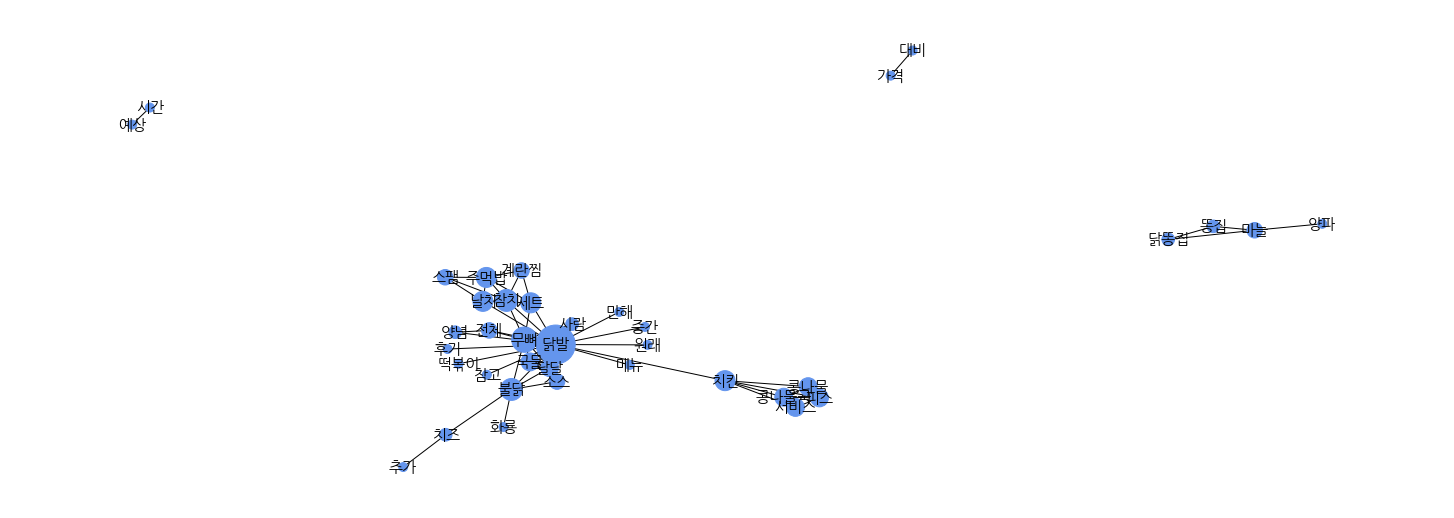

In [8]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib as mat
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import networkx as nx
import operator
from konlpy.tag import Okt 

from collections import Counter
import pandas as pd

file_path = 'C:\\Users\\aaami\\Desktop\\2022_1\\데이터애널리틱스\\과제\\9주차 개인과제\\Midnight_Snack_only.csv'
csv = pd.read_csv(file_path)

review = csv['리뷰']

okt= Okt()
all_review_string = ""
docs = []
for data in review:
    txt = okt.normalize(str(data))    
    docs.append(txt)
    all_review_string += txt
    all_review_string += str(' ')

print(docs.__len__())

word_tokens = okt.nouns(all_review_string);

k = 100
stop_words = "맛 배달 좀 주문 진짜 또 정말 요 더 여기 보통 완전 최고 항상 생각 조금 다음 자주 그냥 것 때 처음 \
집 분 정도 오늘 약간 먹기 곳 하나 역시 이번 살짝 매번 한번 저번 아주 지금 매우 보고 리뷰 별로 제일 다만 도야 안나"
stop_words=stop_words.split(' ')

# 가장 많이 나온 100개 단어만 추출
most_common_words = []
result = [] 

for w in word_tokens: 
    if w not in stop_words: 
        if len(w) > 1:
            result.append(w)

c = Counter(result) # input type should be a list of words (or tokens)
i = 0
for word in c.most_common(k):
    most_common_words.append(word[0])
 
print(most_common_words)

print(c.most_common(k))

# Document-term-matrix 생성
dtm = [[0 for col in range(len(most_common_words))] for row in range(len(docs))]

indexs = []
count = 0
for doc in docs:
    tmp = []
    for word in most_common_words:
        # 각 리뷰에서 키워드가 나타난 횟수
        tmp.append(doc.count(word))
        
    dtm[count] = tmp
    indexs.append(count)
    count+=1

# 테이블 생성 (기록용)
# df = pd.DataFrame(dtm)
# df.index = indexs
# df.columns = most_common_words
# df.to_csv('C:\\Users\\aaami\\Desktop\\2022_1\\데이터애널리틱스\\과제\\9주차 개인과제\\DTM.csv', encoding='utf-8-sig')

# Term corrlation matrix 생성
def dotOper(arr1, arr2):
    answer = np.dot(arr1, arr2).tolist()
    return answer

# -------------------------- 키워드 동시출현 네트워크 생성 ----------------------------------
tcm = dotOper(np.transpose(dtm), dtm)

# 테이블 생성 (기록용)
df = pd.DataFrame(tcm)
df.index = most_common_words
df.columns = most_common_words
df.to_csv('C:\\Users\\aaami\\Desktop\\2022_1\\데이터애널리틱스\\과제\\9주차 개인과제\\All_TCM.csv', encoding='utf-8-sig')

# print(most_common_words)
## 폰트 경로
font_path = 'C:/Users/aaami/AppData/Local/Microsoft/Windows/Fonts/NanumGothic.ttf'
 
## FontProperties 인스턴스 생성
font_prop = fm.FontProperties(fname=font_path)
 
## 폰트 이름
font_name = font_prop.get_name()
 
## 폰트 일괄 설정
mat.rc('font',family=font_name)


plt.figure(figsize=(20, 7))
df = pd.DataFrame(tcm, index=most_common_words, columns=most_common_words)

corr = df.corr()
links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']
links_filtered=links.loc[ (links['value'] > 0.5) & (links['var1'] != links['var2']) ]
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
d = dict(G.degree)
d
nx.draw(G, nodelist = d.keys(), with_labels=True, node_color='cornflowerblue', 
node_size=[v *80 for v in d.values()], edge_color='black', linewidths=1, font_family=font_name,
font_size=15)


# CENTRALITY

# Compute the betweenness centrality of G: bet_cen
bet_cen = nx.betweenness_centrality(G)
sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:10]

# Compute the degree centrality of G: deg_cen
deg_cen = nx.degree_centrality(G)
sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:10]

# Compute the page rank of G: page_rank
page_rank = nx.pagerank(G)
sorted(page_rank.items(), key=lambda x:x[1], reverse=True)[0:10]

# Compute the closeness centrality of G: clos_cen
clos_cen = nx.closeness_centrality(G)
sorted(clos_cen.items(), key=lambda x:x[1], reverse=True)[0:10]
    